## San Francisco Crime Classification

https://www.kaggle.com/c/sf-crime

Description:

"From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred."

## Set Up, Initial Exploration

Imports, set options.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# enables inline plots
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 70)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Load dataset. Take a look at the columns.


From Kaggle documentation:

Dates - timestamp of the crime incident

Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.

Descript - detailed description of the crime incident (only in train.csv)

DayOfWeek - the day of the week

PdDistrict - name of the Police Department District

Resolution - how the crime incident was resolved (only in train.csv)

Address - the approximate street address of the crime incident 

X - Longitude

Y - Latitude

In [129]:
df = pd.read_csv('/Users/eloiserosen/Downloads/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 67.0+ MB


View first 10 rows.

In [130]:
df.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.426,37.775
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424,37.800
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.427,37.801
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.439,37.772


Drop Descript and Resolution columns, since those aren't provided in the test data.

In [131]:
del df['Descript']
del df['Resolution']
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424,37.800
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.427,37.801
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.439,37.772


What are our the different crime categories?

In [132]:
CategoryList = df.Category.unique()
print CategoryList

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


How many entries fall into each category?

In [133]:
df.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

What are the base rates?

In [134]:
cat_percentages = df.copy()
cat_percentages['Total'] = 1
cat_percentages.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Total
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775,1
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775,1
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424,37.800,1
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.427,37.801,1
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.439,37.772,1


In [135]:
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424,37.800
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.427,37.801
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.439,37.772


In [136]:
cat_percentages = cat_percentages.groupby('Category').agg({'Total': np.size, 'Category': np.size})
#cat_percentages['Percentage'] = cat_percentages['Category'] / len(df.index)
cat_percentages.head()

,Category,Total
Category,,
ARSON,1513,1513
ASSAULT,76876,76876
BAD CHECKS,406,406
BRIBERY,289,289
BURGLARY,36755,36755


In [137]:
cat_percentages['Total'] = len(df.index)
cat_percentages.head()

,Category,Total
Category,,
ARSON,1513,878049
ASSAULT,76876,878049
BAD CHECKS,406,878049
BRIBERY,289,878049
BURGLARY,36755,878049


In [138]:
cat_percentages['Percentage'] = (cat_percentages['Category'] / cat_percentages['Total']) *100
cat_percentages.head()

,Category,Total,Percentage
Category,,,
ARSON,1513,878049,0.172
ASSAULT,76876,878049,8.755
BAD CHECKS,406,878049,0.046
BRIBERY,289,878049,0.033
BURGLARY,36755,878049,4.186


In [139]:
cat_percentages = cat_percentages.sort_values(['Percentage'], ascending=[False])
cat_percentages.head(50)

,Category,Total,Percentage
Category,,,
LARCENY/THEFT,174900,878049,19.919
OTHER OFFENSES,126182,878049,14.371
NON-CRIMINAL,92304,878049,10.512
ASSAULT,76876,878049,8.755
DRUG/NARCOTIC,53971,878049,6.147
VEHICLE THEFT,53781,878049,6.125
VANDALISM,44725,878049,5.094
WARRANTS,42214,878049,4.808
BURGLARY,36755,878049,4.186


What days of the week did most of the crimes occur on?

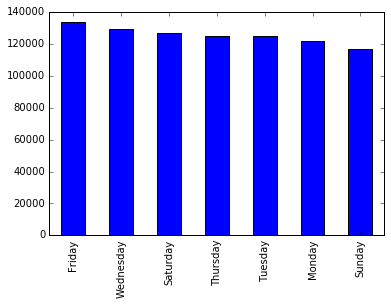

In [140]:
df['DayOfWeek'].value_counts().plot(kind = 'bar')

How are the crime entries distributed across the police districts?

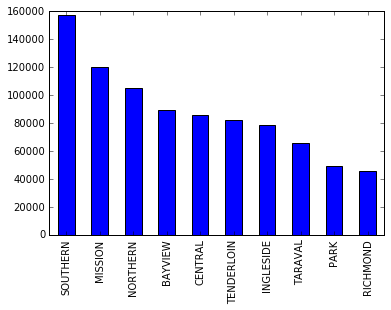

In [141]:
df['PdDistrict'].value_counts().plot('bar')

# Date Column
Use pd.to_datetime() to explicitly cast strings in our Date column.

In [142]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 0 to 878048
Data columns (total 7 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 53.6+ MB


Use datetime method to create an Hour feature. Note that we already have a DayOfWeek column. Drop Dates column for now, but note that it may be interesting to come back and try some different Dates-based features, like Month or Season, as there may be seasonal variation in crimes. Features like IsWorkday or IsBusinessHours may also be interesting.

In [143]:
df['Hour'] = df.Dates.dt.hour
del df['Dates']
df.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775,23
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.426,37.775,23
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424,37.800,23
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.427,37.801,23
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.439,37.772,23


How are crimes distributed by hour of day?

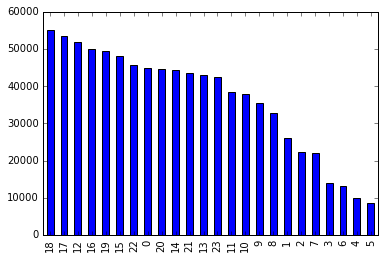

In [144]:
df['Hour'].value_counts().plot('bar')

# Dummy Variables
Create a new temporary dataframe by calling get_dummies() on the DayOfWeek column to create dummy variables for each of the 7 values. Then, merge the new dummy columns into the original dataset and get rid of the original DayOfWeek column which we no longer need. We're going to treat Friday as our baseline and exclude it from our fit, to prevent multicollinearity. Repeat process for PdDistrict (where we drop the Southern district) and for Hour of Day (where we drop hour 18).

In [145]:
dummy_DayOfWeek = pd.get_dummies(df['DayOfWeek'], prefix='Day')
del dummy_DayOfWeek['Day_Friday']
del df['DayOfWeek']
df = df.join(dummy_DayOfWeek)
dummy_PdDistrict = pd.get_dummies(df['PdDistrict'], prefix='District')
del dummy_PdDistrict['District_SOUTHERN']
del df['PdDistrict']
df = df.join(dummy_PdDistrict)
dummy_Hour = pd.get_dummies(df['Hour'], prefix='Hour')
del dummy_Hour['Hour_18']
del df['Hour']
df = df.join(dummy_Hour)

df.head()

,Category,Address,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,WARRANTS,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424,37.800,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.427,37.801,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.439,37.772,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


Take a closer look at the Address column.

In [146]:
AddressList = df.Address.unique()
print len(AddressList)
print df.Address.value_counts()

23228
800 Block of BRYANT ST             26533
800 Block of MARKET ST              6581
2000 Block of MISSION ST            5097
1000 Block of POTRERO AV            4063
900 Block of MARKET ST              3251
0 Block of TURK ST                  3228
0 Block of 6TH ST                   2884
300 Block of ELLIS ST               2703
400 Block of ELLIS ST               2590
16TH ST / MISSION ST                2504
1000 Block of MARKET ST             2489
1100 Block of MARKET ST             2319
2000 Block of MARKET ST             2168
100 Block of OFARRELL ST            2140
700 Block of MARKET ST              2081
3200 Block of 20TH AV               2035
100 Block of 6TH ST                 1887
500 Block of JOHNFKENNEDY DR        1824
TURK ST / TAYLOR ST                 1810
200 Block of TURK ST                1800
0 Block of PHELAN AV                1791
0 Block of UNITEDNATIONS PZ         1789
0 Block of POWELL ST                1717
100 Block of EDDY ST                1681
1400 Block

In [147]:
df['StreetCorner'] = df['Address'].str.contains('/').map(int)
df['Block'] = df['Address'].str.contains('Block').map(int)
df.head()

,Category,Address,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,StreetCorner,Block
0,WARRANTS,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,0
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,0
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424,37.800,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,0
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.427,37.801,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0,1
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.439,37.772,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0,1


In [148]:
df['CornerBlockSum'] = df['StreetCorner'] + df['Block']
df.head()

,Category,Address,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,StreetCorner,Block,CornerBlockSum
0,WARRANTS,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,0,1
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,0,1
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424,37.800,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,0,1
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.427,37.801,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0,1,1
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.439,37.772,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0,1,1


In [149]:
df.CornerBlockSum.value_counts()

1    878049
Name: CornerBlockSum, dtype: int64

All addresses are either a corner or a block. Will drop one to prevent multicollinearity.

In [150]:
del df['CornerBlockSum']
del df['Block']
df.head()

,Category,Address,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,StreetCorner
0,WARRANTS,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
1,OTHER OFFENSES,OAK ST / LAGUNA ST,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
2,OTHER OFFENSES,VANNESS AV / GREENWICH ST,-122.424,37.800,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
3,LARCENY/THEFT,1500 Block of LOMBARD ST,-122.427,37.801,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0
4,LARCENY/THEFT,100 Block of BRODERICK ST,-122.439,37.772,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0


There are 23228 different addresses in our data, making this column difficult to work with (dummy variables infeasible, for example). Additionally, the information is mostly already captured in the longitude and latitude columns (X and Y). So, take the Address column out of our data, at least for now.

In [151]:
del df['Address']
df.head()

,Category,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,StreetCorner
0,WARRANTS,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
1,OTHER OFFENSES,-122.426,37.775,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
2,OTHER OFFENSES,-122.424,37.800,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1
3,LARCENY/THEFT,-122.427,37.801,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0
4,LARCENY/THEFT,-122.439,37.772,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0


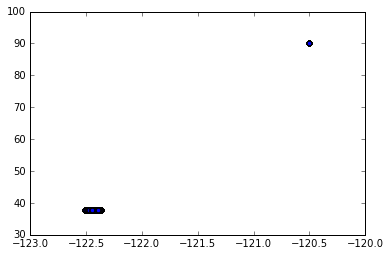

In [152]:
plt.scatter(df.X, df.Y)

Outliers are no where near SF. Take a closer look at those data points.

In [153]:
df_wrong_lat_long = df[df['Y'] > 80]
df_wrong_lat_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 660485 to 871198
Data columns (total 42 columns):
Category               67 non-null object
X                      67 non-null float64
Y                      67 non-null float64
Day_Monday             67 non-null float64
Day_Saturday           67 non-null float64
Day_Sunday             67 non-null float64
Day_Thursday           67 non-null float64
Day_Tuesday            67 non-null float64
Day_Wednesday          67 non-null float64
District_BAYVIEW       67 non-null float64
District_CENTRAL       67 non-null float64
District_INGLESIDE     67 non-null float64
District_MISSION       67 non-null float64
District_NORTHERN      67 non-null float64
District_PARK          67 non-null float64
District_RICHMOND      67 non-null float64
District_TARAVAL       67 non-null float64
District_TENDERLOIN    67 non-null float64
Hour_0                 67 non-null float64
Hour_1                 67 non-null float64
Hour_2                 67 non

In [154]:
df_wrong_lat_long.head(70)

,Category,X,Y,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,District_BAYVIEW,District_CENTRAL,District_INGLESIDE,District_MISSION,District_NORTHERN,District_PARK,District_RICHMOND,District_TARAVAL,District_TENDERLOIN,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,StreetCorner
660485,LARCENY/THEFT,-120.500,90.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1
660711,ASSAULT,-120.500,90.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
660712,ASSAULT,-120.500,90.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
661106,NON-CRIMINAL,-120.500,90.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
666430,OTHER OFFENSES,-120.500,90.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
667042,TRESPASS,-120.500,90.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1
669946,OTHER OFFENSES,-120.500,90.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
671709,OTHER OFFENSES,-120.500,90.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1
673078,LARCENY/THEFT,-120.500,90.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1
673114,WARRANTS,-120.500,90.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1


What are the base rates? How do they compare to the base rates of the complete data set? (i.e. does the fact that the lat/long were an incorrect value help us make better predictions?)

In [156]:
wrong_lat_long_percentages = df_wrong_lat_long.copy()
wrong_lat_long_percentages['Total'] = 1
wrong_lat_long_percentages = wrong_lat_long_percentages.groupby('Category').agg({'Total': np.size, 'Category': np.size})
#cat_percentages['Percentage'] = cat_percentages['Category'] / len(df.index)
wrong_lat_long_percentages['Total'] = len(df_wrong_lat_long.index)
wrong_lat_long_percentages['Percentage'] = (wrong_lat_long_percentages['Category'] / wrong_lat_long_percentages['Total']) *100
wrong_lat_long_percentages = wrong_lat_long_percentages.sort_values(['Percentage'], ascending=[False])
wrong_lat_long_percentages.head(50)

,Category,Total,Percentage
Category,,,
OTHER OFFENSES,17,67,25.373
LARCENY/THEFT,15,67,22.388
VEHICLE THEFT,9,67,13.433
WARRANTS,8,67,11.940
ASSAULT,4,67,5.970
NON-CRIMINAL,4,67,5.970
DISORDERLY CONDUCT,2,67,2.985
SUSPICIOUS OCC,2,67,2.985
BURGLARY,1,67,1.493


There isn't a super strong pattern to what's ommitted. So, just impute the incorrect latitudes and longitudes with the median.

In [ ]:
df_wrong_lat_long.Category.value_counts()

## Target Vector and Feature Matrix

In [ ]:
#target vector y
y = df['Category']
y.head()

In [ ]:
#Matrix of X's.
X = df
del X['Category']
X.head()

## k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Use grid search to find the optimal value of k.

In [ ]:
from sklearn.grid_search import GridSearchCV
k_range = range(1, 51, 2)
param_grid = {'n_neighbors' : k_range}
grid = GridSearchCV(knn, param_grid, n_jobs=4)
grid.fit(X, y)
print grid.grid_scores_
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

With k=7, we get accuracy of 35%. Random accuracy would have been 2.6%.

In [ ]:
# for use generating kaggle entry at end of notebook, when I don't want to run the whole grid search again
# don't need to run this otherwise
from sklearn.neighbors import KNeighborsClassifier
# Create Model
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=7, p=2,
           weights='uniform')
# Fit the model
knn.fit(X, y)

## Naive Bayes

In [ ]:
from sklearn.cross_validation import train_test_split, cross_val_score
# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Bernoulli Model

In [ ]:
#Using Bernoulli model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

In [ ]:
#5-fold cross validation
from sklearn import cross_validation
scores = cross_validation.cross_val_score(bnb, X, y, cv=5)
print scores
print scores.mean()

Gaussian Model

In [ ]:
# Using Gaussian model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

In [ ]:
# 5-fold cross validation
from sklearn import cross_validation
scores = cross_validation.cross_val_score(gnb, X, y, cv=5)
print scores
print scores.mean()

Multinomial Model.
To use multinomial naive bayes, all our features must be non-negative. Our longitude data (column labeled 'X') has negative values. 

In [ ]:
X.head()

We can use MinMaxScaler() with a range of [0,1] to address this problem.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
# scale the longitude column and save it as an array called longitude_minmax
longitude_minmax = min_max_scaler.fit_transform(X['X'])
# change longitude_minmax into a dataframe so we can easily use it
longitude_minmax_df = pd.DataFrame(longitude_minmax, columns=['scaled_longitude'])

# make a new copy of our feature matrix, called pos_X
pos_X = X.copy()
# in this version of our feature matrix, we don't need the original logitude column, so delete that
del pos_X['X']
# now, put our scaled longitude column together with the rest of our pos_X dataframe
pos_X = pd.concat([longitude_minmax_df, pos_X], axis=1)
pos_X.head()

In [ ]:
from sklearn.cross_validation import train_test_split, cross_val_score
# 70/30 train/test split
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(pos_X, y, test_size=0.3)


In [ ]:
# Using Multinomial model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(m_X_train, m_y_train)
mnb.score(m_X_test, m_y_test)

In [ ]:
# 5-fold cross validation
from sklearn import cross_validation
scores = cross_validation.cross_val_score(mnb, pos_X, y, cv=5)
print scores
print scores.mean()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=4)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

## Support Vector Machines

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm
svc = svm.SVC()
# Range of possible values for C (for all kernels), gamma (rbf kernel), degree (polynomial kernel)
C_range = 10.0 ** np.arange(-2, 5)
gamma_range = 10.0 ** np.arange(-4, 5)
degree_range=[2,3,4]
# Different kernels to try
kernels=['linear', 'poly', 'rbf']
param_grid = dict(C=C_range, gamma=gamma_range, degree=degree_range, kernel=kernels)
grid = GridSearchCV(svc, param_grid, scoring='accuracy', n_jobs=4)
grid.fit(X, y)
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

## Decision Trees
First try decision tree classifier without specifying the depth of the tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
cross_val_score(dtc, X, y)

Grid search to optimize depth of the tree.

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'max_depth': np.arange(3, 10)}
grid = GridSearchCV(dtc, param_grid, n_jobs=2)
grid.fit(X, y)
print grid.grid_scores_
print grid.best_score_
print grid.best_estimator_
print grid.best_params_

## Random Forest

In [ ]:
## RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=1)
rfc.fit(X_train, y_train)
print cross_val_score(rfc, X, y)

## Generate Kaggle Entry

In [ ]:
# read in test csv
kdf = pd.read_csv("/Users/eloiseheydenrych/Downloads/small-test.csv")


# do the same data processing things I did earlier in the notebook:

# use to_datetime to turn dates string into something useful
kdf['Dates'] = pd.to_datetime(kdf['Dates'])
kdf['Hour'] = kdf.Dates.dt.hour
del kdf['Dates']

# get dummies
dummy_DayOfWeek = pd.get_dummies(kdf['DayOfWeek'], prefix='Day')
del dummy_DayOfWeek['Day_Friday']
del kdf['DayOfWeek']
kdf = kdf.join(dummy_DayOfWeek)
dummy_PdDistrict = pd.get_dummies(kdf['PdDistrict'], prefix='District')
del dummy_PdDistrict['District_SOUTHERN']
del kdf['PdDistrict']
kdf = kdf.join(dummy_PdDistrict)
dummy_Hour = pd.get_dummies(kdf['Hour'], prefix='Hour')
del dummy_Hour['Hour_18']
del kdf['Hour']
kdf = kdf.join(dummy_Hour)

# delete address column
del kdf['Address']

# delete the id column for now so that we can run our classifier
kaggle_X = kdf
ids = kaggle_X['Id']
del kaggle_X['Id']

# get our predictions
predictions = pd.DataFrame(knn.predict(kaggle_X), columns=['Category'])

# put the id column back
predictions = pd.concat([ids, predictions], axis=1)

# change into expected format
formatted_predictions = pd.get_dummies(predictions['Category'])

# create csv
formatted_predictions.to_csv('final_submission.csv')